In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('./sample_data.csv')

In [3]:
df['STARTED_TS'] = pd.to_datetime(df['STARTED_TS'], format='%d/%m/%y %H:%M')

In [4]:
df.head()

,PARTICIPANT_ID,PARTICIPANT_TZ,STUDY_ID,STUDY_NAME,STUDY_VERSION,SURVEY_ID,SURVEY_NAME,TRIGGER,EXPORT_TZ,START_END,...,DESK/COMPUTER_RT,INTENTION,INTENTION_RT,AWARENESS,AWARENESS_RT,THOUGHT_FOCUS,THOUGHT_FOCUS_RT,ACTIVITY,EFFORT,EFFORT_RT
0,64988952,UTC,FM2vyCURL,Treadmill questionnaire,4,dZCm_Jjha,treadmill pilot,scheduled,Australia/Sydney,0,...,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>
1,391004739,Australia/Melbourne,FM2vyCURL,Treadmill questionnaire,12,dZCm_Jjha,treadmill pilot,scheduled,Australia/Sydney,1,...,1137,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<not-shown>,<not-shown>,<not-shown>
2,157154735,UTC,FM2vyCURL,Treadmill questionnaire,4,dZCm_Jjha,treadmill pilot,scheduled,Australia/Sydney,0,...,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>
3,64988952,UTC,FM2vyCURL,Treadmill questionnaire,4,dZCm_Jjha,treadmill pilot,scheduled,Australia/Sydney,0,...,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>
4,625477853,local,FM2vyCURL,Treadmill questionnaire,10,dZCm_Jjha,treadmill pilot,scheduled,Australia/Sydney,1,...,1316,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<not-shown>,<not-shown>,<not-shown>


In [5]:
open_day = datetime(2020, 9, 1)
close_day = datetime(2020, 9, 30)
df = df[(df['STARTED_TS'] >= open_day) & (df['STARTED_TS'] <= close_day)]

In [7]:
df['STARTED_TS'].head()


7    2020-09-02 15:19:00
10   2020-09-17 13:49:00
13   2020-09-07 19:05:00
14   2020-09-11 08:10:00
16   2020-09-16 16:13:00
Name: STARTED_TS, dtype: datetime64[ns]

In [8]:
df.columns

Index(['PARTICIPANT_ID', 'PARTICIPANT_TZ', 'STUDY_ID', 'STUDY_NAME',
       'STUDY_VERSION', 'SURVEY_ID', 'SURVEY_NAME', 'TRIGGER', 'EXPORT_TZ',
       'START_END', 'CREATED_TS', 'SCHEDULED_TS', 'STARTED_TS', 'COMPLETED_TS',
       'EXPIRED_TS', 'UPLOADED_TS', 'TOTAL_RT', 'RAND_PROB',
       'WORKING/NOT_WORKING', 'WORKING/NOT_WORKING_RT', 'FIXED/DYNAMIC',
       'FIXED/DYNAMIC_RT', 'TASK_FOCUS', 'TASK_FOCUS_RT', 'INTENTIONAL_MW',
       'INTENTIONAL_MW_RT', 'AWARE_MW', 'AWARE_MW_RT', 'PARALLEL_THOUGHTS',
       'PARALLEL_THOUGHTS_RT', 'TEMPORAL_FOCUS', 'TEMPORAL_FOCUS_RT',
       'NOVELTY', 'NOVELTY_RT', 'MEANING', 'MEANING_RT', 'ACTIVITY_1',
       'ACTIVITY_2', 'ACTIVITY_3', 'ACTIVITY_4', 'ACTIVITY_5', 'ACTIVITY_6',
       'ACTIVITY_7', 'ACTIVITY_8', 'ACTIVITY_9', 'ACTIVITY_RT',
       'OTHER_ACTIVITY', 'OTHER_ACTIVITY_RT', 'DURATION', 'DURATION_RT',
       'WORKING/BREAK', 'WORKING/BREAK_RT', 'POSTURE', 'POSTURE_RT',
       'POSTURE_DURATION', 'POSTURE_DURATION_RT', 'TASK_DIFFICULT

In [9]:
i = pd.date_range('01/9/20', periods=10000, freq='30min')
order_data= pd.DataFrame({'PARTICIPANT_ID': np.arange(0,10000),"STARTED_TS":i})

In [10]:
keep_cols = ['PARTICIPANT_ID', 'WORKING/NOT_WORKING', 'FIXED/DYNAMIC', 'TASK_FOCUS', 'INTENTIONAL_MW', 'AWARE_MW', 'PARALLEL_THOUGHTS', 'TEMPORAL_FOCUS', 'NOVELTY', 'MEANING', 'ACTIVITY_1',
       'ACTIVITY_2', 'ACTIVITY_3', 'ACTIVITY_4', 'ACTIVITY_5', 'ACTIVITY_6','ACTIVITY_7', 'ACTIVITY_8', 'ACTIVITY_9', 'OTHER_ACTIVITY', 'DURATION', 'WORKING/BREAK', 'POSTURE', 'POSTURE_DURATION', 'TASK_DIFFICULTY', 'PRODUCTIVITY', 'EMOTIONS', 'SLEEPINESS', 'AWARENESS_MW', 'DESK/COMPUTER', 'INTENTION', 'AWARENESS', 'THOUGHT_FOCUS', 'ACTIVITY', 'EFFORT']
filteredDF = df[keep_cols]

In [11]:
print(filteredDF.shape)
filteredDF.head()

(876, 35)


,PARTICIPANT_ID,WORKING/NOT_WORKING,FIXED/DYNAMIC,TASK_FOCUS,INTENTIONAL_MW,AWARE_MW,PARALLEL_THOUGHTS,TEMPORAL_FOCUS,NOVELTY,MEANING,...,PRODUCTIVITY,EMOTIONS,SLEEPINESS,AWARENESS_MW,DESK/COMPUTER,INTENTION,AWARENESS,THOUGHT_FOCUS,ACTIVITY,EFFORT
7,157154735,1,3,3,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,...,2,4,3,<no-response>,1,1,3,3,6,2
10,55090659,2,<not-shown>,<not-shown>,<no-response>,<no-response>,<not-shown>,<no-response>,<no-response>,<no-response>,...,<not-shown>,<not-shown>,<not-shown>,<no-response>,2,<not-shown>,<not-shown>,<not-shown>,<not-shown>,<not-shown>
13,391004739,2,<not-shown>,<not-shown>,<no-response>,<no-response>,<not-shown>,<no-response>,<no-response>,<no-response>,...,<not-shown>,<not-shown>,<not-shown>,<no-response>,2,<not-shown>,<not-shown>,<not-shown>,<not-shown>,<not-shown>
14,105402877,2,<not-shown>,<not-shown>,<no-response>,<no-response>,<not-shown>,<no-response>,<no-response>,<no-response>,...,<not-shown>,<not-shown>,<not-shown>,<no-response>,2,<not-shown>,<not-shown>,<not-shown>,<not-shown>,<not-shown>
16,64988952,1,1,1,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,<no-response>,...,3,3,5,<no-response>,1,<not-shown>,<not-shown>,<not-shown>,2,3


In [12]:
ignoreList = ['PARTICIPANT_ID']
for colname in keep_cols:
    if colname not in ignoreList:
        filteredDF[colname] = pd.to_numeric(filteredDF[colname], errors='coerce').fillna(-1).astype(int)

<ipython-input-12-5d7bd4d44a43>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredDF[colname] = pd.to_numeric(filteredDF[colname], errors='coerce').fillna(-1).astype(int)


In [13]:
filteredDF.head()

,PARTICIPANT_ID,WORKING/NOT_WORKING,FIXED/DYNAMIC,TASK_FOCUS,INTENTIONAL_MW,AWARE_MW,PARALLEL_THOUGHTS,TEMPORAL_FOCUS,NOVELTY,MEANING,...,PRODUCTIVITY,EMOTIONS,SLEEPINESS,AWARENESS_MW,DESK/COMPUTER,INTENTION,AWARENESS,THOUGHT_FOCUS,ACTIVITY,EFFORT
7,157154735,1,3,3,-1,-1,-1,-1,-1,-1,...,2,4,3,-1,1,1,3,3,6,2
10,55090659,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,2,-1,-1,-1,-1,-1
13,391004739,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,2,-1,-1,-1,-1,-1
14,105402877,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,2,-1,-1,-1,-1,-1
16,64988952,1,1,1,-1,-1,-1,-1,-1,-1,...,3,3,5,-1,1,-1,-1,-1,2,3


In [14]:
filteredDF[filteredDF['TASK_FOCUS'].notnull()]

,PARTICIPANT_ID,WORKING/NOT_WORKING,FIXED/DYNAMIC,TASK_FOCUS,INTENTIONAL_MW,AWARE_MW,PARALLEL_THOUGHTS,TEMPORAL_FOCUS,NOVELTY,MEANING,...,PRODUCTIVITY,EMOTIONS,SLEEPINESS,AWARENESS_MW,DESK/COMPUTER,INTENTION,AWARENESS,THOUGHT_FOCUS,ACTIVITY,EFFORT
7,157154735,1,3,3,-1,-1,-1,-1,-1,-1,...,2,4,3,-1,1,1,3,3,6,2
10,55090659,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,2,-1,-1,-1,-1,-1
13,391004739,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,2,-1,-1,-1,-1,-1
14,105402877,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,2,-1,-1,-1,-1,-1
16,64988952,1,1,1,-1,-1,-1,-1,-1,-1,...,3,3,5,-1,1,-1,-1,-1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,55090659,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,2,-1,-1,-1,-1,-1
2657,625477853,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,2,-1,-1,-1,-1,-1
2661,391004739,1,1,1,-1,-1,-1,-1,-1,-1,...,4,4,4,-1,1,-1,-1,-1,1,4
2664,391004739,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,2,-1,-1,-1,-1,-1


In [15]:
filteredDF.dtypes

PARTICIPANT_ID         int64
WORKING/NOT_WORKING    int64
FIXED/DYNAMIC          int64
TASK_FOCUS             int64
INTENTIONAL_MW         int64
AWARE_MW               int64
PARALLEL_THOUGHTS      int64
TEMPORAL_FOCUS         int64
NOVELTY                int64
MEANING                int64
ACTIVITY_1             int64
ACTIVITY_2             int64
ACTIVITY_3             int64
ACTIVITY_4             int64
ACTIVITY_5             int64
ACTIVITY_6             int64
ACTIVITY_7             int64
ACTIVITY_8             int64
ACTIVITY_9             int64
OTHER_ACTIVITY         int64
DURATION               int64
WORKING/BREAK          int64
POSTURE                int64
POSTURE_DURATION       int64
TASK_DIFFICULTY        int64
PRODUCTIVITY           int64
EMOTIONS               int64
SLEEPINESS             int64
AWARENESS_MW           int64
DESK/COMPUTER          int64
INTENTION              int64
AWARENESS              int64
THOUGHT_FOCUS          int64
ACTIVITY               int64
EFFORT        

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/hist.py:309: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  ax.hist(values, bins=bins, **kwds)


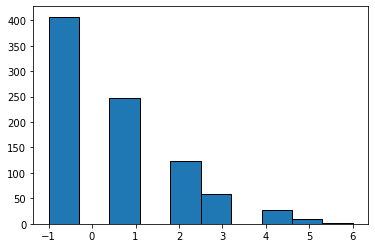

In [16]:
filteredDF['TASK_FOCUS'].hist(grid=False, edgecolor="K")

<ipython-input-17-3a27adbab4d8>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


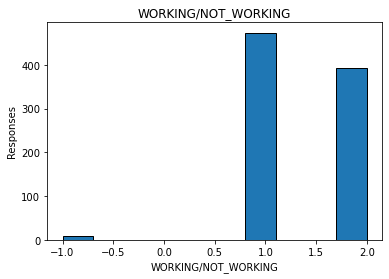

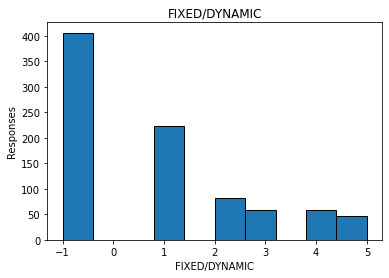

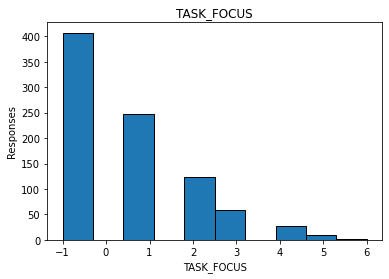

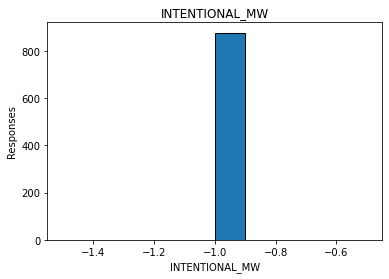

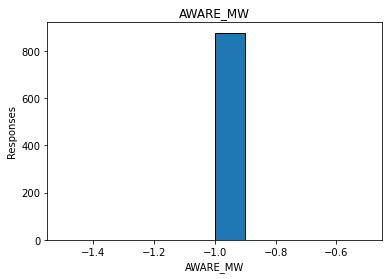

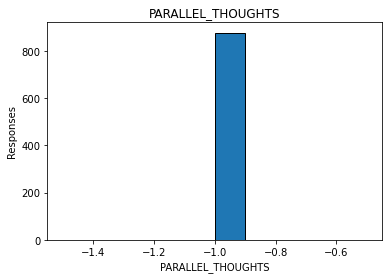

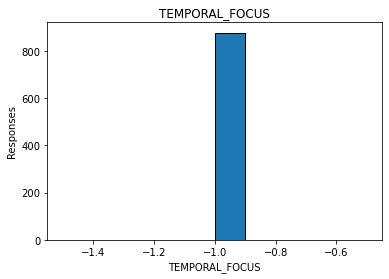

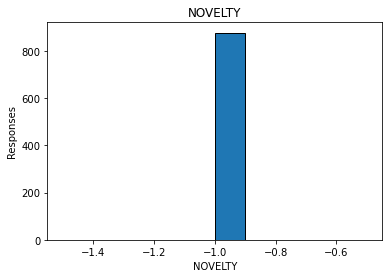

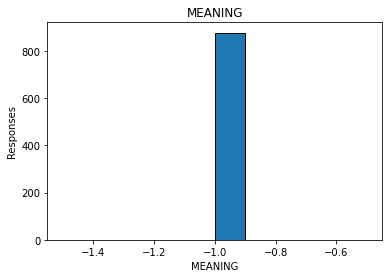

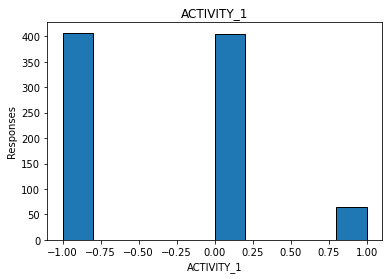

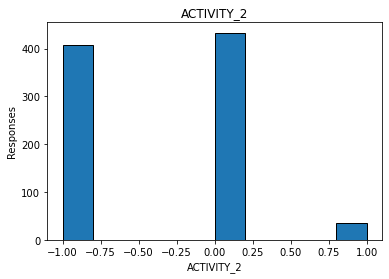

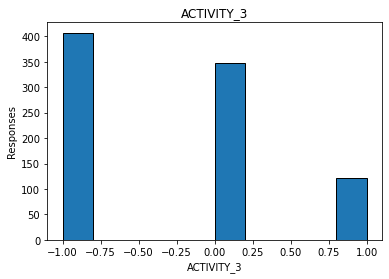

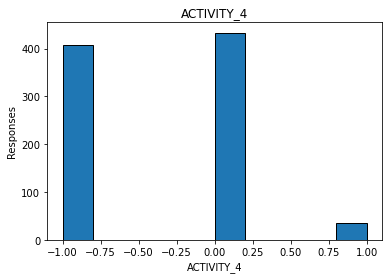

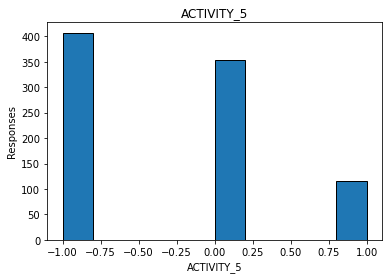

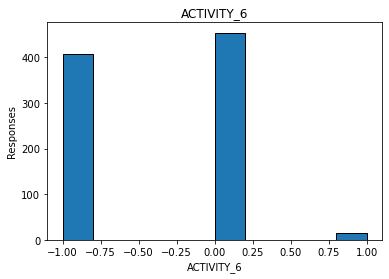

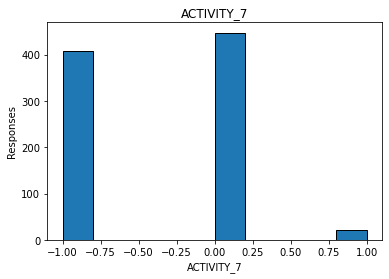

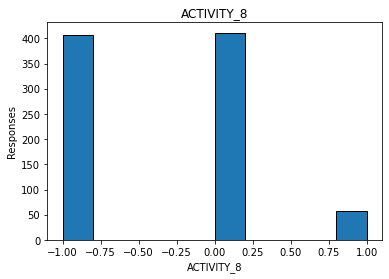

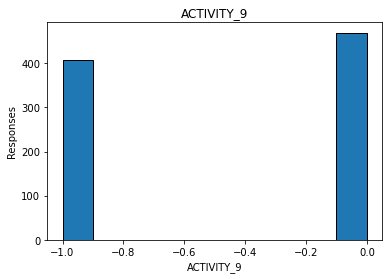

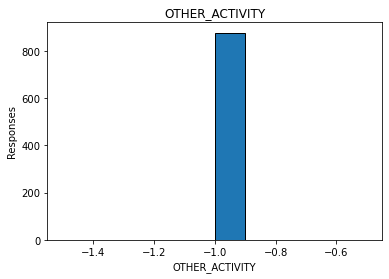

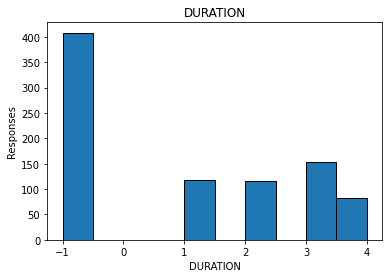

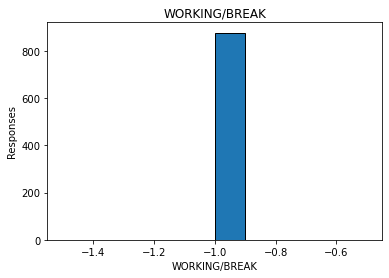

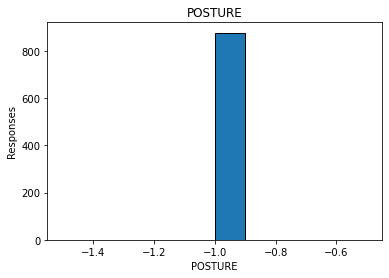

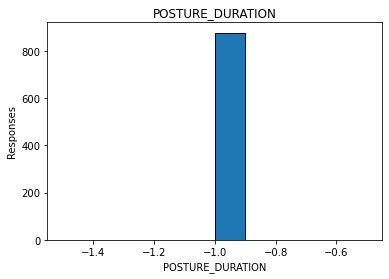

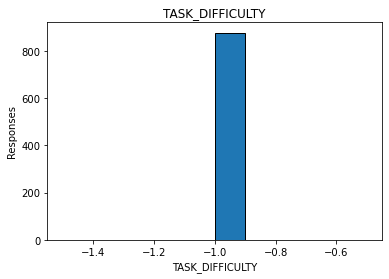

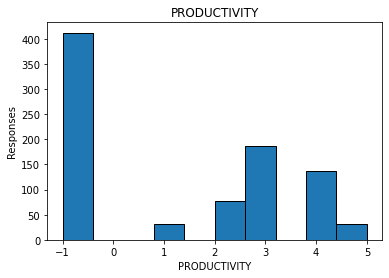

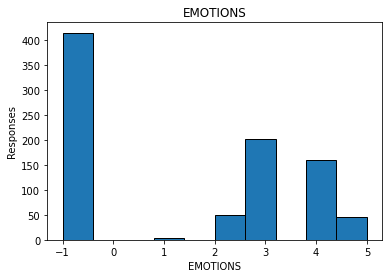

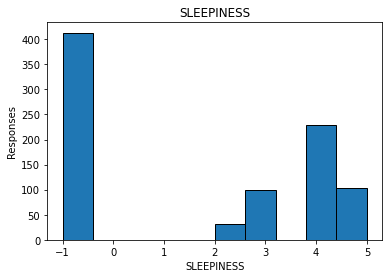

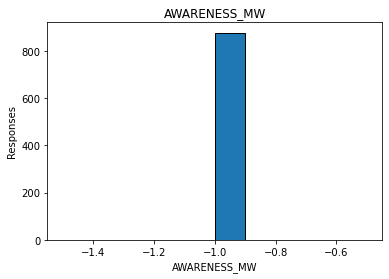

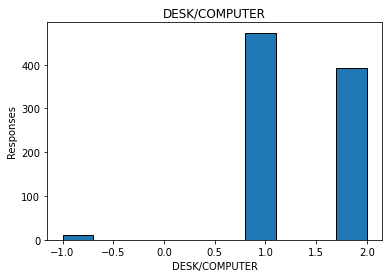

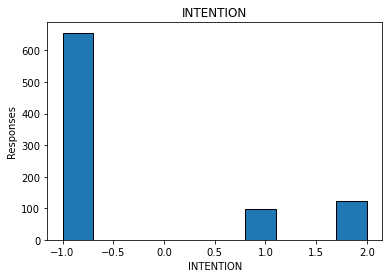

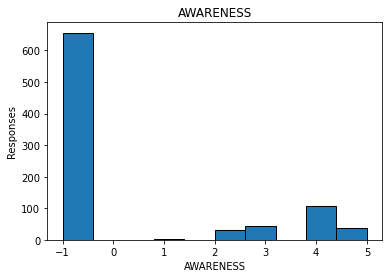

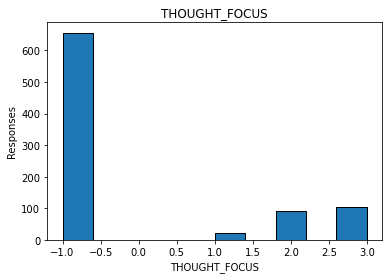

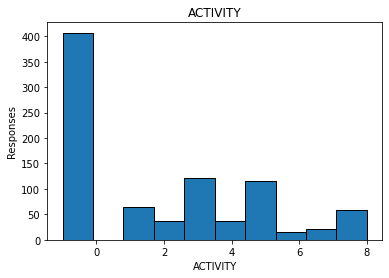

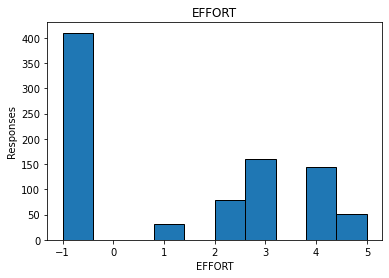

In [17]:
for colname in keep_cols:
    if colname not in ignoreList:
        plt.figure()
        plt.title(colname)
        plt.xlabel(colname)
        plt.ylabel('Responses')
        filteredDF[colname].hist(grid=False, edgecolor="k" )
        